# Ensembles & Neural Networks

Ensembles:
*   Introduction
*   Bagging meta-estimator
*   Forests of randomized trees
  *   Random Forests Classifier
  *   Extremely Randomized Trees
* AdaBoost
* Stacked generalization



Neural Networks (Multilayer Perceptron - MLP):


*   Introduction
*   Classification
*   Regression
*   Regularization
*   Notes
*   Exercise



__________________________________________



## Introduction

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Three families of ensemble methods are usually distinguished:

- 1. <b>bagging:</b> In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.
 Examples are: Bagging methods, Forests of randomized trees.

- 2. <b>boosting:</b> By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.
 Examples are: AdaBoost, Gradient Tree Boosting.
 
- 3. <b>stacking:</b> that often considers heterogeneous weak learners, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models predictions.
 Examples are: StackingClassifier, tackingRegressor


## Bagging meta-estimator
In scikit-learn, bagging methods are offered as a unified <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier'>BaggingClassifier</a> meta-estimator (resp. <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor'>BaggingRegressor</a>), taking as input a user-specified base estimator along with parameters specifying the strategy to draw random subsets. In particular, *max_samples* and *max_features* control the size of the subsets (in terms of samples and features), while *bootstrap* and *bootstrap_features* control whether samples and features are drawn with or without replacement. When using a subset of the available samples the generalization accuracy can be estimated with the *out-of-bag* samples by setting *oob_score=True*. 
As an example, the snippet below illustrates how to instantiate a bagging ensemble of <a href='https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'>KNeighborsClassifier</a> base estimators, each built on random subsets of 50% of the samples and 50% of the features.

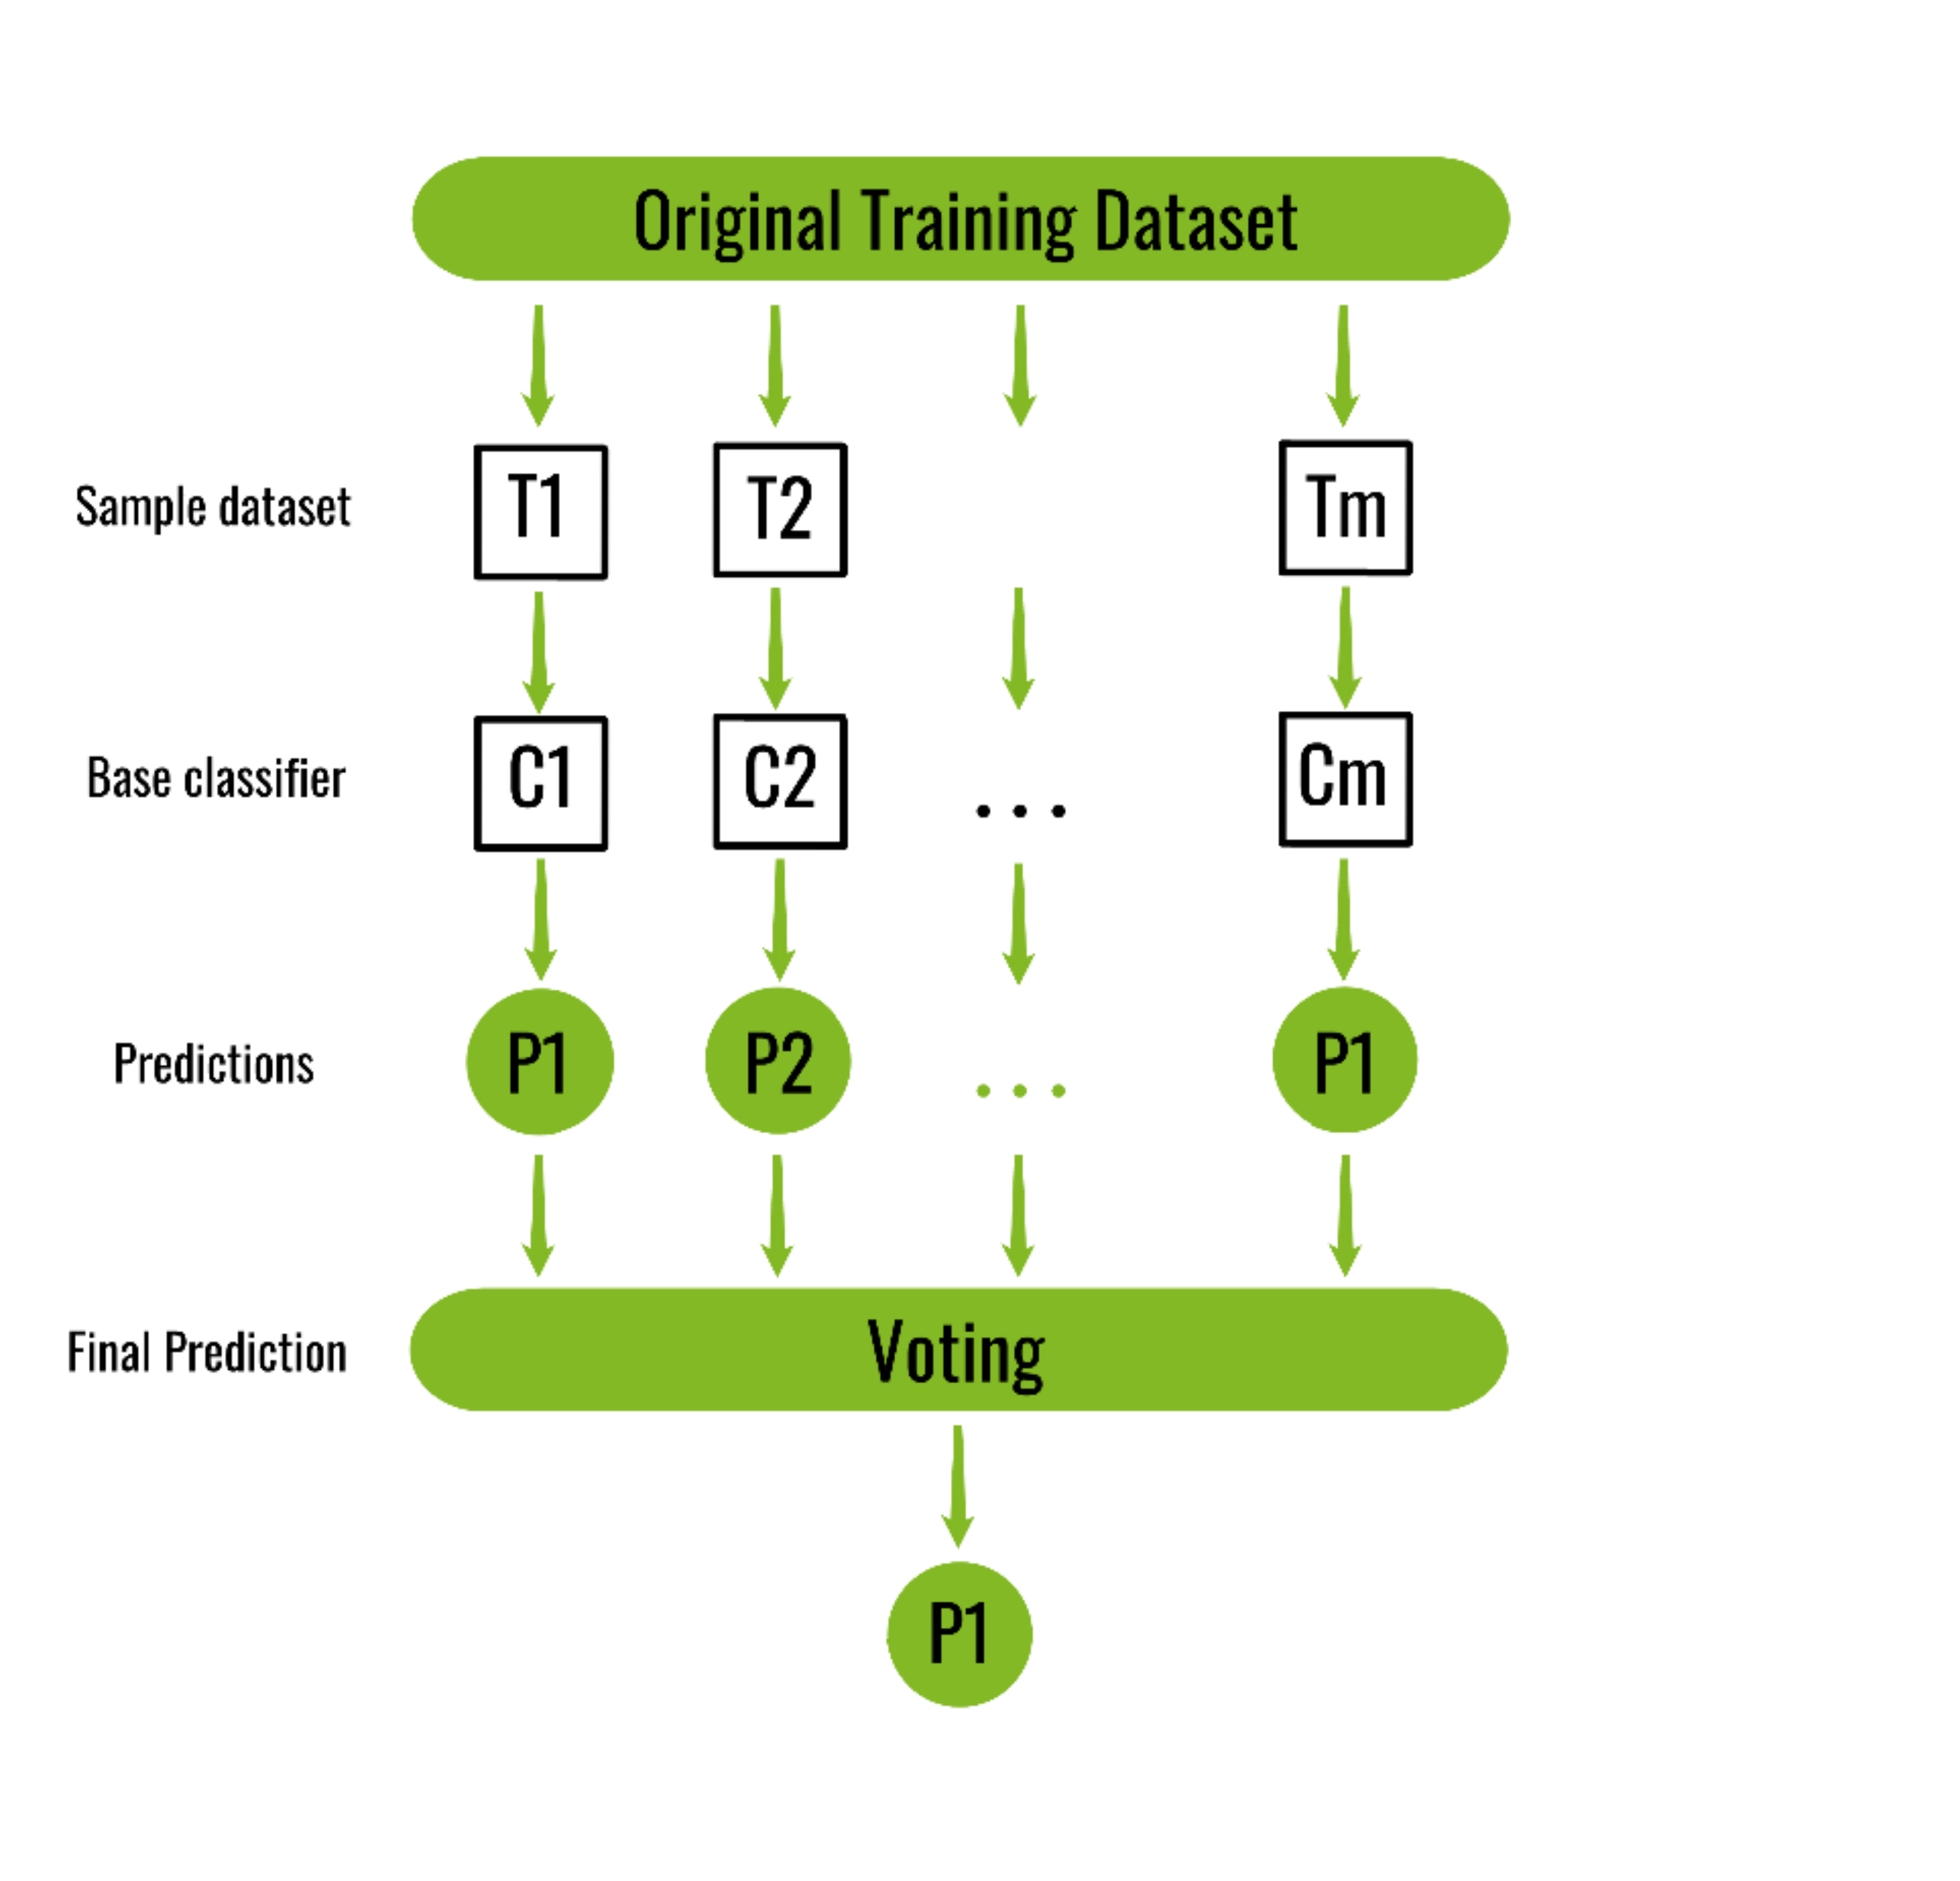

In [ ]:
#Example of BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

then you proceed as usual...

## Forests of randomized trees
The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine techniques specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

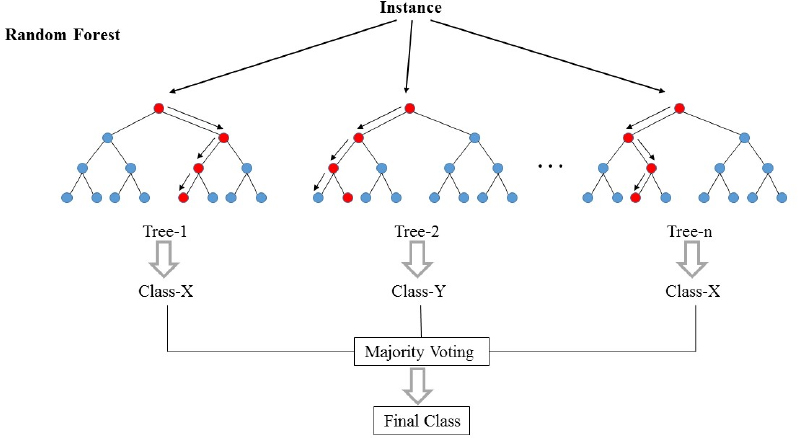
As other classifiers, forest classifiers have to be fitted with two arrays: a sparse or dense array X of size [n_samples, n_features] holding the training samples, and an array Y of size [n_samples] holding the target values (class labels) for the training samples:

In [ ]:
#Example of BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

### Random Forests
In random forests (see <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier'>RandomForestClassifier</a> and <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor'>RandomForestRegressor</a> classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size *max_features*. 

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. 
Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

<b><span style='color:red'>In contrast to the original algorithm definition, the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.</span></b>



### Extremely Randomized Trees
In extremely randomized trees (see <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier'>ExtraTreesClassifier</a> and <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor'>ExtraTreesRegressor</a> classes), randomness goes one step further in the way splits are computed. 

As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias (the reference page for <a href='https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html'>make_blobs</a>):

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100, random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print("DTC",scores.mean())


clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print("RFC",scores.mean())


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print("ETC",scores.mean() > 0.999)

DTC 0.9823000000000001
RFC 0.9997
ETC True


### <span style='color:green'>sklearn.ensemble supports Parallelization!</span>

If <b>n_jobs=k</b> then computations are partitioned into <b>k</b> jobs, and run on <b>k</b> cores of the machine. 
If n_jobs=-1 then all cores available on the machine are used. Note that because of inter-process communication overhead, the speedup might not be linear (i.e., using k jobs will unfortunately not be k times as fast). Significant speedup can still be achieved though when building a large number of trees, or when building a single tree requires a fair amount of time (e.g., on large datasets).


# <span style='color:green'>Feature importance from RFTs and ERTs!</span>
Those estimates are stored as an attribute named <b>feature_importances_</b> on the fitted model. This is an array with shape <b>(n_features,)</b> whose values are positive and sum to 1.0. The higher the value, the more important is the contribution of the matching feature to the prediction function.

## AdaBoost

The module sklearn.ensemble includes the popular boosting algorithm AdaBoost, introduced in 1995 by Freund and Schapire.

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.
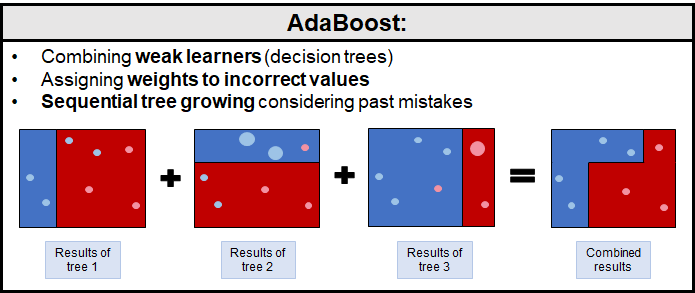

AdaBoost can be used both for classification and regression problems:

For multi-class classification, <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier'>AdaBoostClassifier</a> implements AdaBoost-SAMME and AdaBoost-SAMME.R.

For regression, <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor'>AdaBoostRegressor</a> implements AdaBoost.R2.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9466666666666665

The number of weak learners is controlled by the parameter <b>n_estimators</b>. The <b>learning_rate</b> parameter controls the contribution of the weak learners in the final combination. By default, weak learners are decision stumps (i.e., <b>DecisionTreeClassifier(max_depth=1)</b>). Different weak learners can be specified through the base_estimator parameter. The main parameters to tune to obtain good results are <b>n_estimators</b> and the complexity of the base estimators (e.g., its depth max_depth or minimum required number of samples to consider a split min_samples_split).

<b>Additional available algorithms (i.e., Gradient Tree Boosting, Histogram-Based Gradient Boosting, VotingClassifier, VotingRegressor, Stacked generalization) are described <a href='https://scikit-learn.org/stable/modules/ensemble.html'>here</a></b>.

## Stacked generalization
Stacked generalization is a method for combining estimators to reduce their biases. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

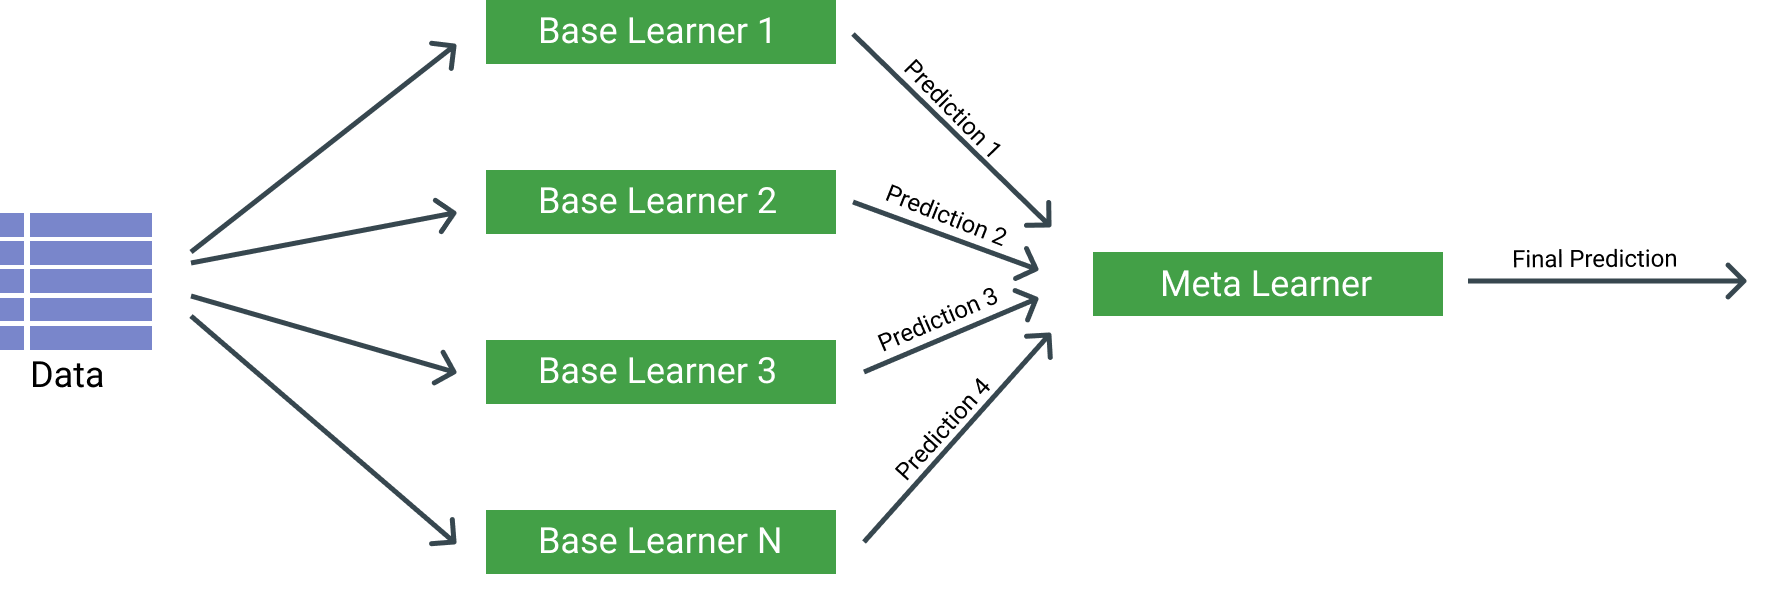


The <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier'>StackingClassifier</a> and <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html#sklearn.ensemble.StackingRegressor'>StackingRegressor</a> provide such strategies which can be applied to classification and regression problems.

The estimators parameter corresponds to the list of the estimators which are stacked together in parallel on the input data. It should be given as a list of names and estimators:

In [ ]:
# create the sub estimators
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
estimators = [ ('dtr', DecisionTreeClassifier(random_state=42)),
               ('svr', SVC(C=1, gamma=1e-6))]

# define the stacked ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
reg = StackingClassifier(estimators=estimators,
                         final_estimator=GradientBoostingClassifier(random_state=42))

# fit the ensemble
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
reg.fit(X_train, y_train)

StackingClassifier(estimators=[('dtr', DecisionTreeClassifier(random_state=42)),
                               ('svr', SVC(C=1, gamma=1e-06))],
                   final_estimator=GradientBoostingClassifier(random_state=42))

In [ ]:
from sklearn.metrics import matthews_corrcoef
y_pred = reg.predict(X_test)
print(f"Matthew's coefficient correlation (MCC) = {matthews_corrcoef(y_test, y_pred)}")

Matthew's coefficient correlation (MCC) = 1.0


# Neural Networks

## Introduction
Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $f(\cdot): R^m \rightarrow R^o$  by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure below shows a one hidden layer MLP with scalar output.

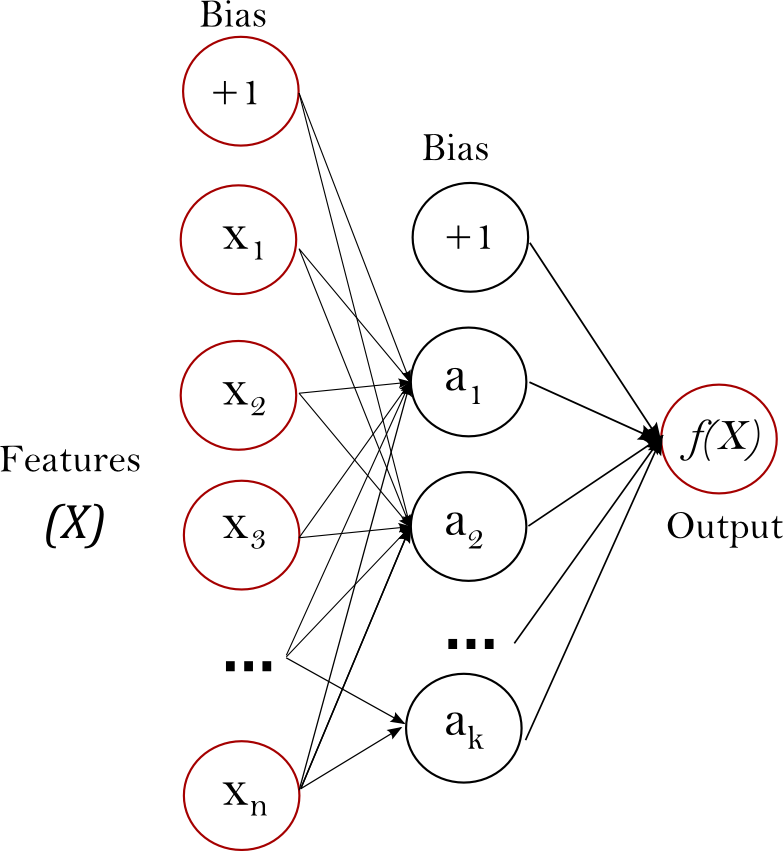

The leftmost layer, known as the input layer, consists of a set of neurons $\{x_i | x_1, x_2, ..., x_m\}$
 representing the input features. Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.




The module contains the public attributes <b>coefs_</b> and <b>intercepts_</b>.

<b>coefs_</b> is a list of weight matrices, where weight matrix at index $i$ represents the weights between layer  $i$ and layer $i+1$. 

<b>intercepts_</b> is a list of bias vectors, where the vector at index $i$ represents the bias values added to layer $i+1$.

Activation functions: <b>activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’</b>

- ‘identity’, no-op activation, useful to implement linear bottleneck, returns $f(x) = x$

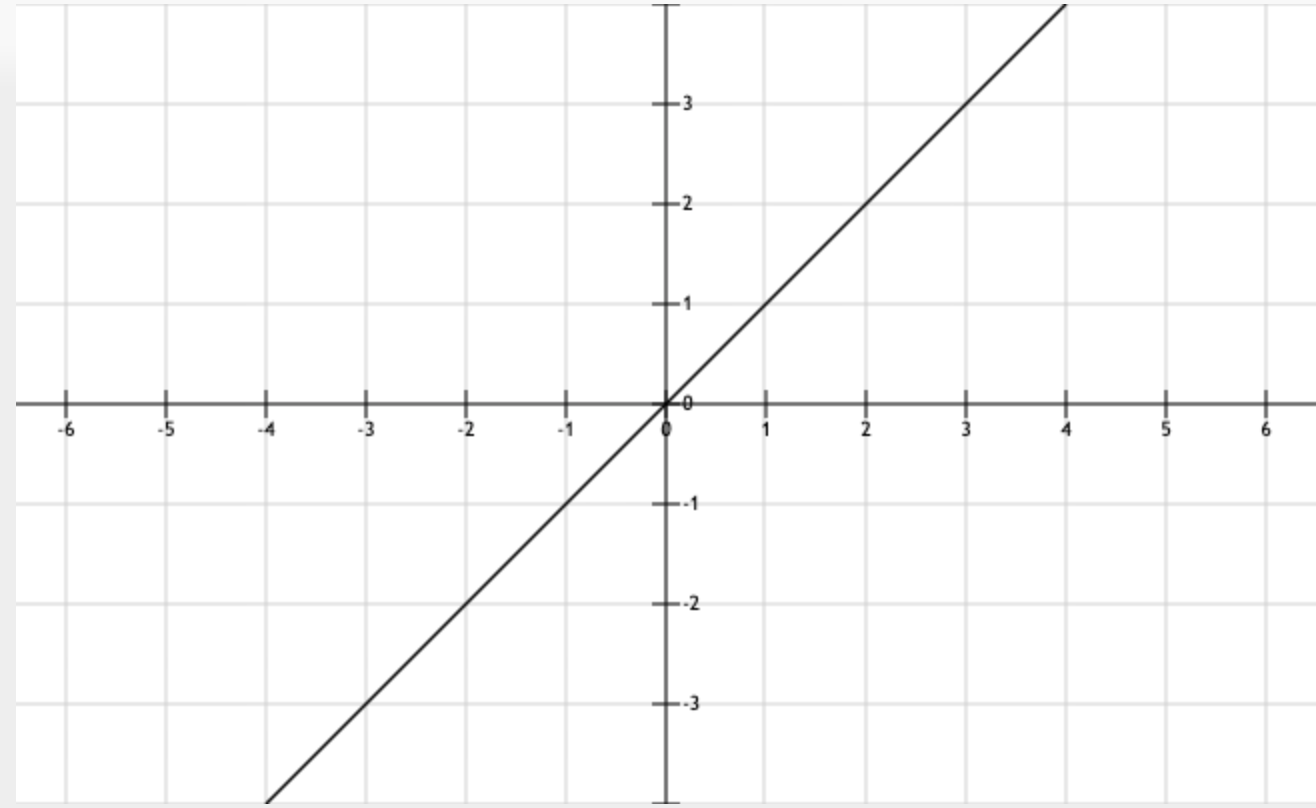


- ‘logistic’, the logistic sigmoid function, returns $f(x) = \frac{1}{1 + e^{-x}}$.
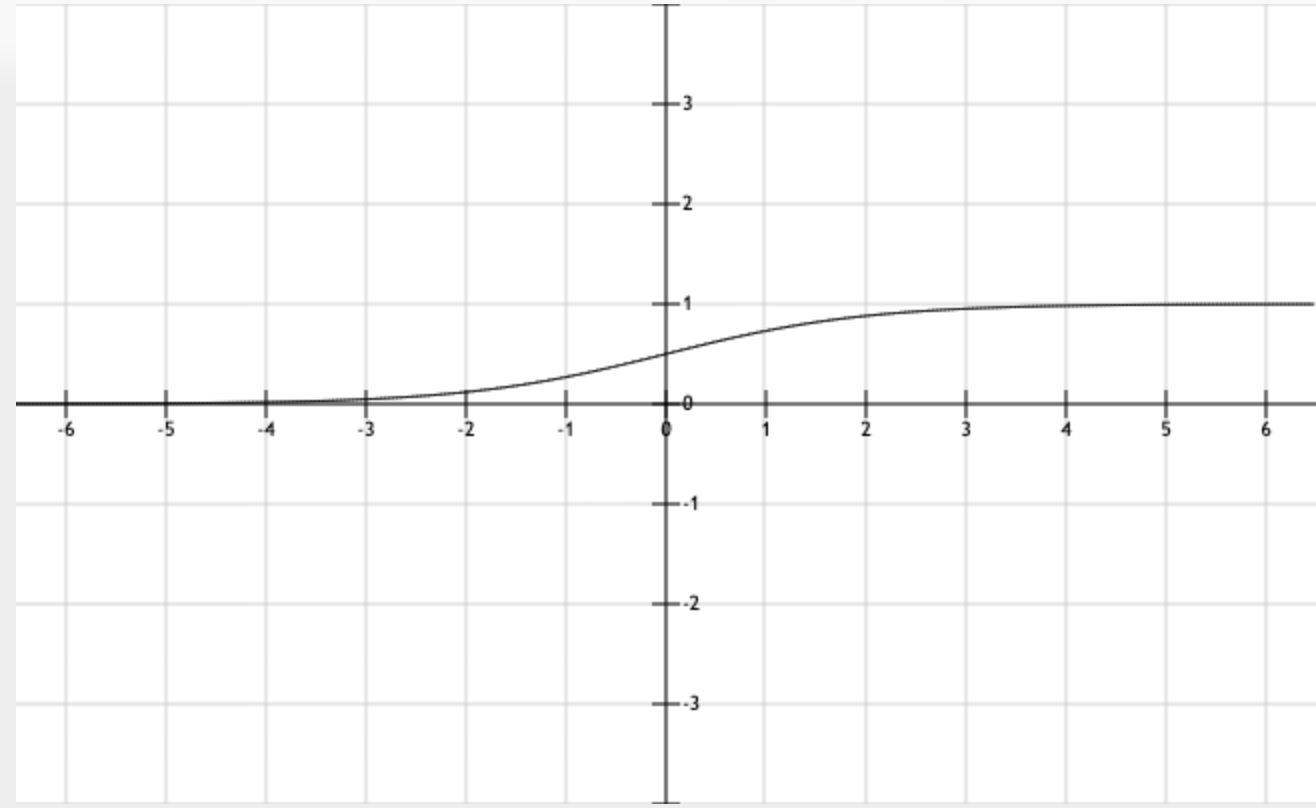


- ‘tanh’, the hyperbolic tan function, returns $f(x) = tanh(x)$.
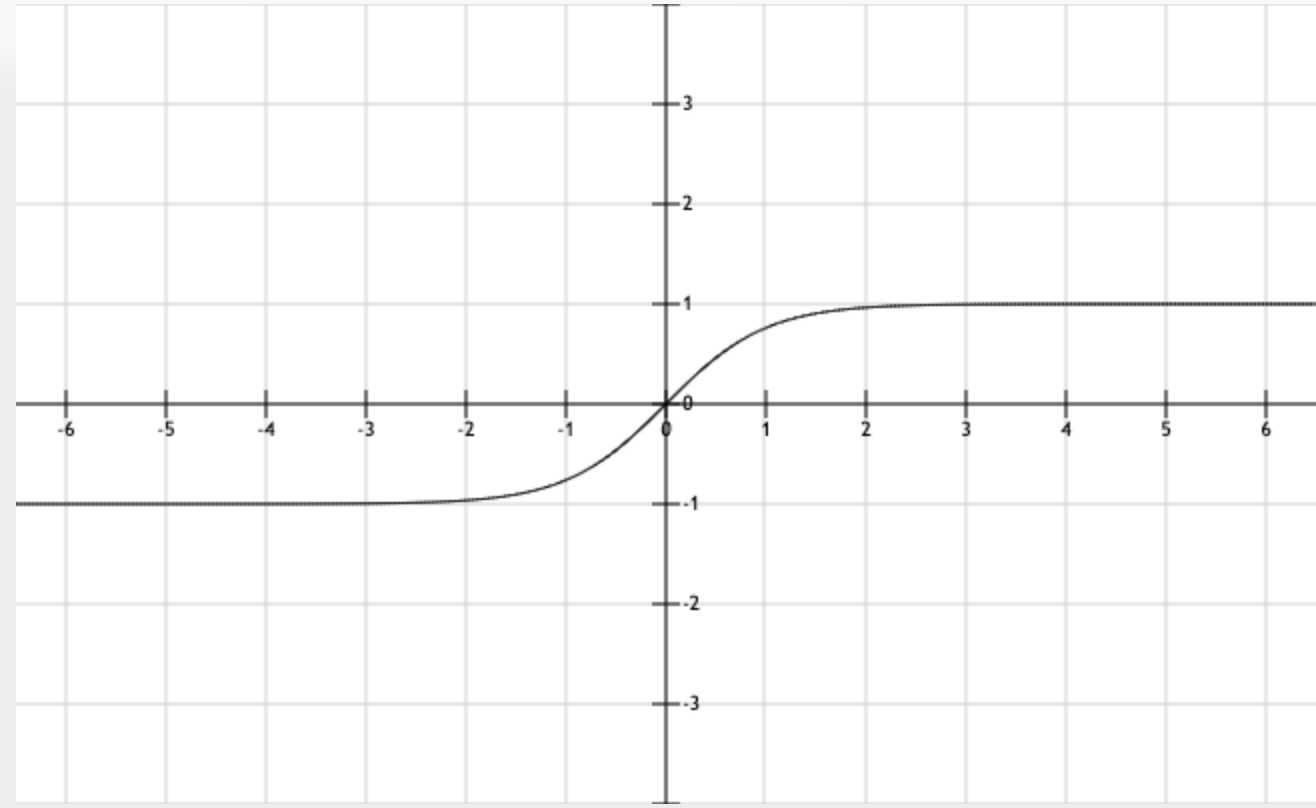


- ‘relu’, the rectified linear unit function, returns $f(x) = max(0, x)$

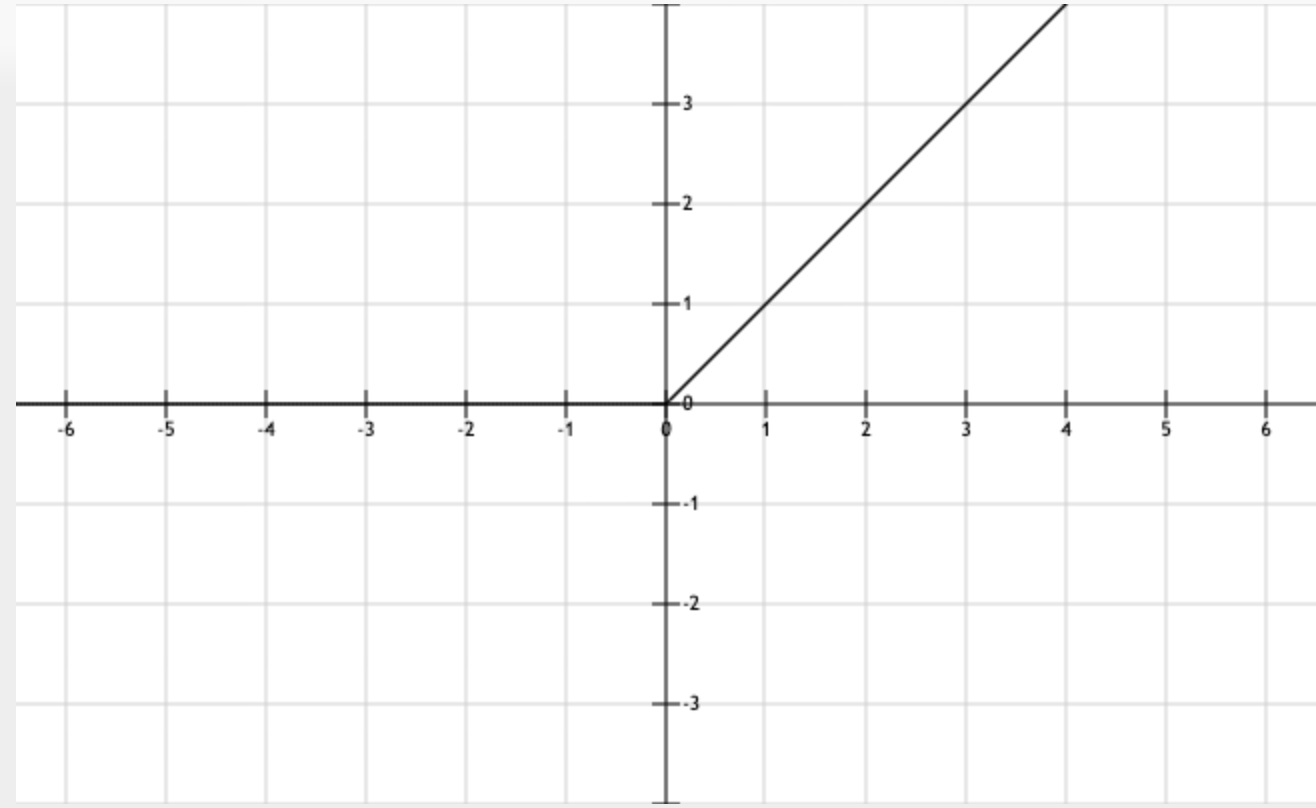
The advantages of Multi-layer Perceptron are:

- Capability to learn non-linear models.

- Capability to learn models in real-time (on-line learning) using partial_fit.

The disadvantages of Multi-layer Perceptron (MLP) include:

- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.

- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.

- MLP is sensitive to feature scaling.

## Classification
Class <a href='https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier'>MLPClassifier</a> implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation. Notice that for simplicity reasons, we're relying on scikit-learn for a simple neural network architecture. More complex models - or if you want to trace the gradients in backprop - you can opt for a PyTorch implementation.

MLP trains on two arrays: array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels) for the training samples:

In [ ]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
# 'lbfgs' is an optimizer in the family of quasi-Newton methods.
# 'lbfgs' is good for smaller datasets and converges easier than 'adam'
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

After fitting (training), the model can predict labels for new samples:

In [ ]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

## Regression
Class <a href='https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor'>MLPRegressor</a> implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

MLPRegressor also supports multi-output regression, in which a sample can have more than one target.



## Regularization
Both MLPRegressor and MLPClassifier use parameter alpha for regularization (L2 regularization) term which helps in avoiding overfitting by penalizing weights with large magnitudes. Following plot displays varying decision function with value of alpha.

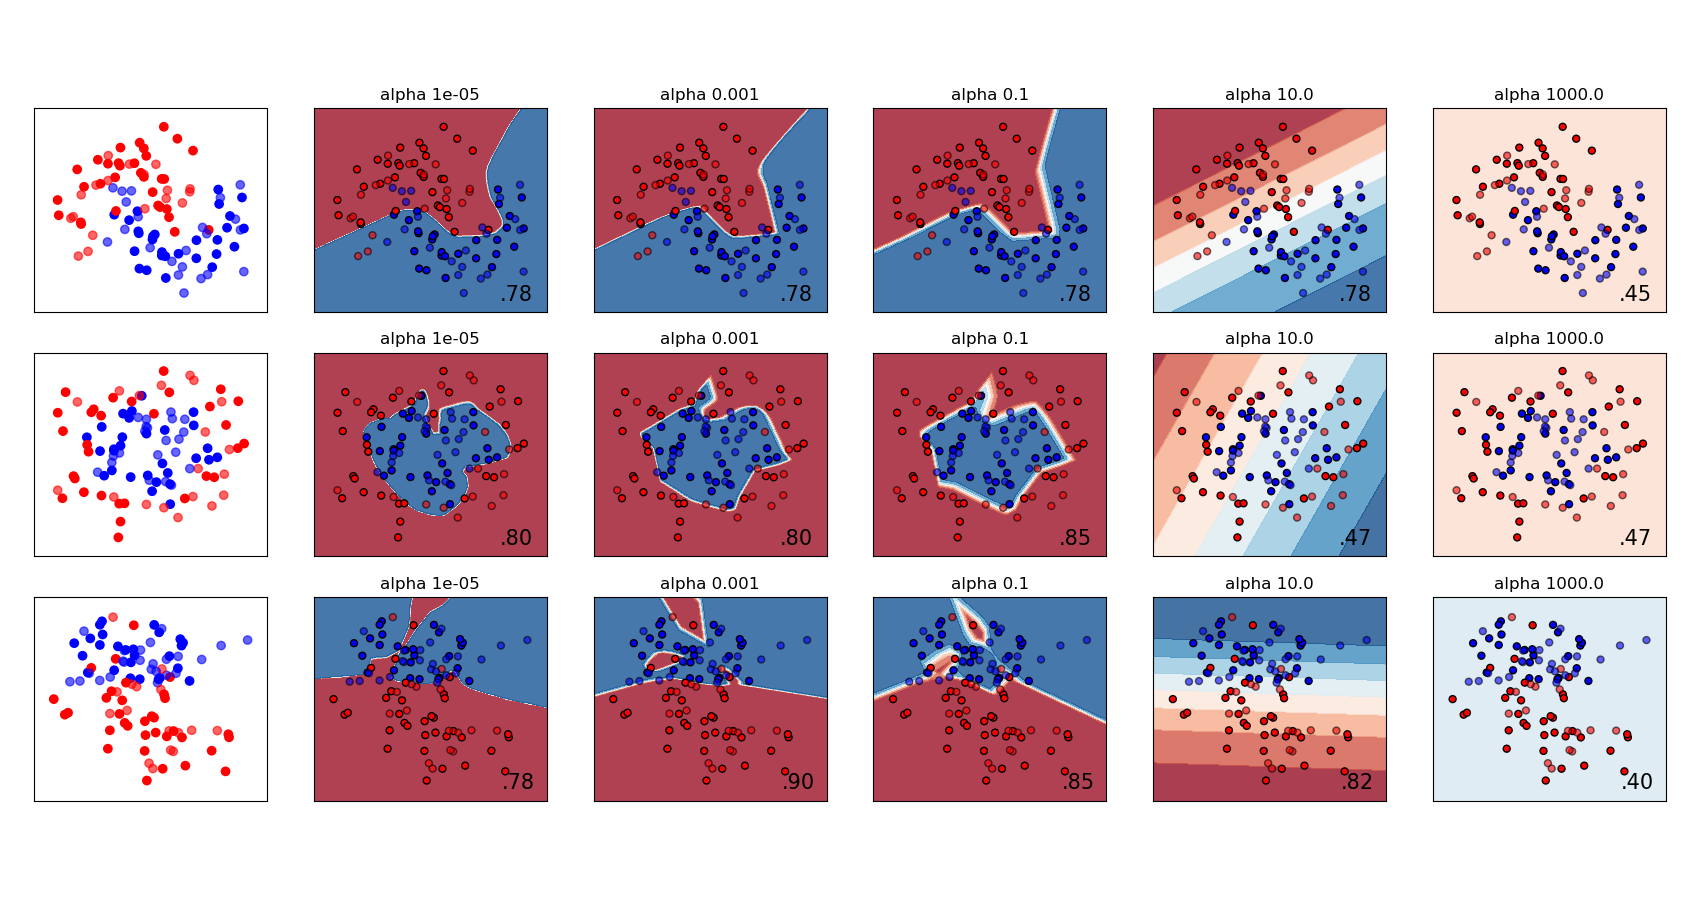

## Notes
MLP trains using <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>Stochastic Gradient Descent</a> , <a href='https://arxiv.org/abs/1412.6980'>Adam</a>, or <a href='https://en.wikipedia.org/wiki/Limited-memory_BFGS'>L-BFGS</a>. Stochastic Gradient Descent (SGD) updates parameters using the gradient of the loss function with respect to a parameter that needs adaptation, i.e.

$w \leftarrow w - \eta (\alpha \frac{\partial R(w)}{\partial w}
+ \frac{\partial Loss}{\partial w})$
 
where $\eta$ is the learning rate which controls the step-size in the parameter space search.  $Loss$ is the loss function used for the network.

More details can be found in the documentation of <a href='https://scikit-learn.org/stable/modules/sgd.html'>SGD</a>

Adam is similar to SGD in a sense that it is a stochastic optimizer, but it can automatically adjust the amount to update parameters based on adaptive estimates of lower-order moments.

With SGD or Adam, training supports online and mini-batch learning.

L-BFGS is a solver that approximates the Hessian matrix which represents the second-order partial derivative of a function. Further it approximates the inverse of the Hessian matrix to perform parameter updates. The implementation uses the Scipy version of <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_l_bfgs_b.html'>L-BFGS</a>.

<span style='color:red'>If the selected solver is ‘L-BFGS’, training does not support online nor mini-batch learning.</span>

- Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results. You can use StandardScaler for standardization.


- Finding a reasonable regularization parameter $\alpha$ is best done using an optimization search usually in the range $10.0^{-np.arange(1, 7)}$.


- Empirically, L-BFGS converges faster and with better solutions on small datasets. For relatively large datasets, however, Adam is very robust. It usually converges quickly and gives pretty good performance. SGD with momentum or nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned.

## Excercise
create a toy dataset for each of the following:

1) for single output binary classification

2) for multiple output binary classification

3) for single output multicalss (i.e., 3) classification

4) for multiple output multiclass (i.e., 3) classification
 
instatiate an MLPClassifier (+1 point) - or write custom PyTorch code if you want +2 points on the challenge - for each of the above toy datasets and report how many output nodes are created for each of the above problem.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
#1) for single output binary classification
X=[[0,0],[1,0],[1,0],[1,1]]
y= [0, 1, 1, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(2, 2), random_state=1)
clf.fit(X, y)
print('1)',clf.n_outputs_)

#2) for single output binary classification
X=[[0,0],[1,0],[1,0],[1,1]]
y= [[0,1], [1,0], [1,0], [1,0]]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(2, 2), random_state=1)
clf.fit(X, y)
print('2)',clf.n_outputs_)

#3) for single output multicalss (i.e., 3 or more) classification
X=[[0,0],[1,0],[1,0],[1,1]]
y= [0, 1, 2, 3]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(2, 2), random_state=1)
clf.fit(X, y)
print('3)',clf.n_outputs_)

#4) for multiple output multicalss (i.e., 3 or more) classification
X=[[0,0],[1,0],[1,0],[1,1]]
y= [[0,1,0,1], [0,1,1,0], [0,1,1,0], [0,0,0,1]]
clf = MultiOutputClassifier(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(2, 2), random_state=1))
clf.fit(X, y)

print(f'4) {clf.predict(X).shape[1]}')

1) 1
2) 2
3) 4
4) 4
